## Assignment-6-Logistic_Regression_Binary_bank

### Problem Stetement

#### Output variable -> y
#### y -> Whether the client has subscribed a term deposit or not 
#### Binomial ("yes" or "no")


### Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Import Data

In [5]:
bank_data=pd.read_csv('bank-full.csv',delimiter=';')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
bank_data.shape

(45211, 17)

### EDA
#### Missing values

<Axes: >

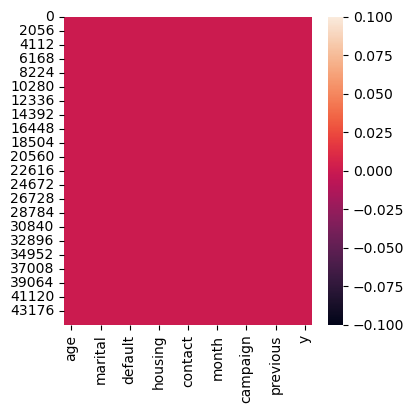

In [5]:
plt.subplots(figsize=(4,4))
sns.heatmap(bank_data.isnull())

In [6]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### There is no missing values

In [7]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Graphical Analysis
#### Let's check  plots of dedifferent independent  variables .
#### Dividing our dataset into two depending upon the binary classes 'yes' and 'no'

In [7]:
d_yes=bank_data[bank_data.y=='yes']
d_no =bank_data[bank_data.y=='no']

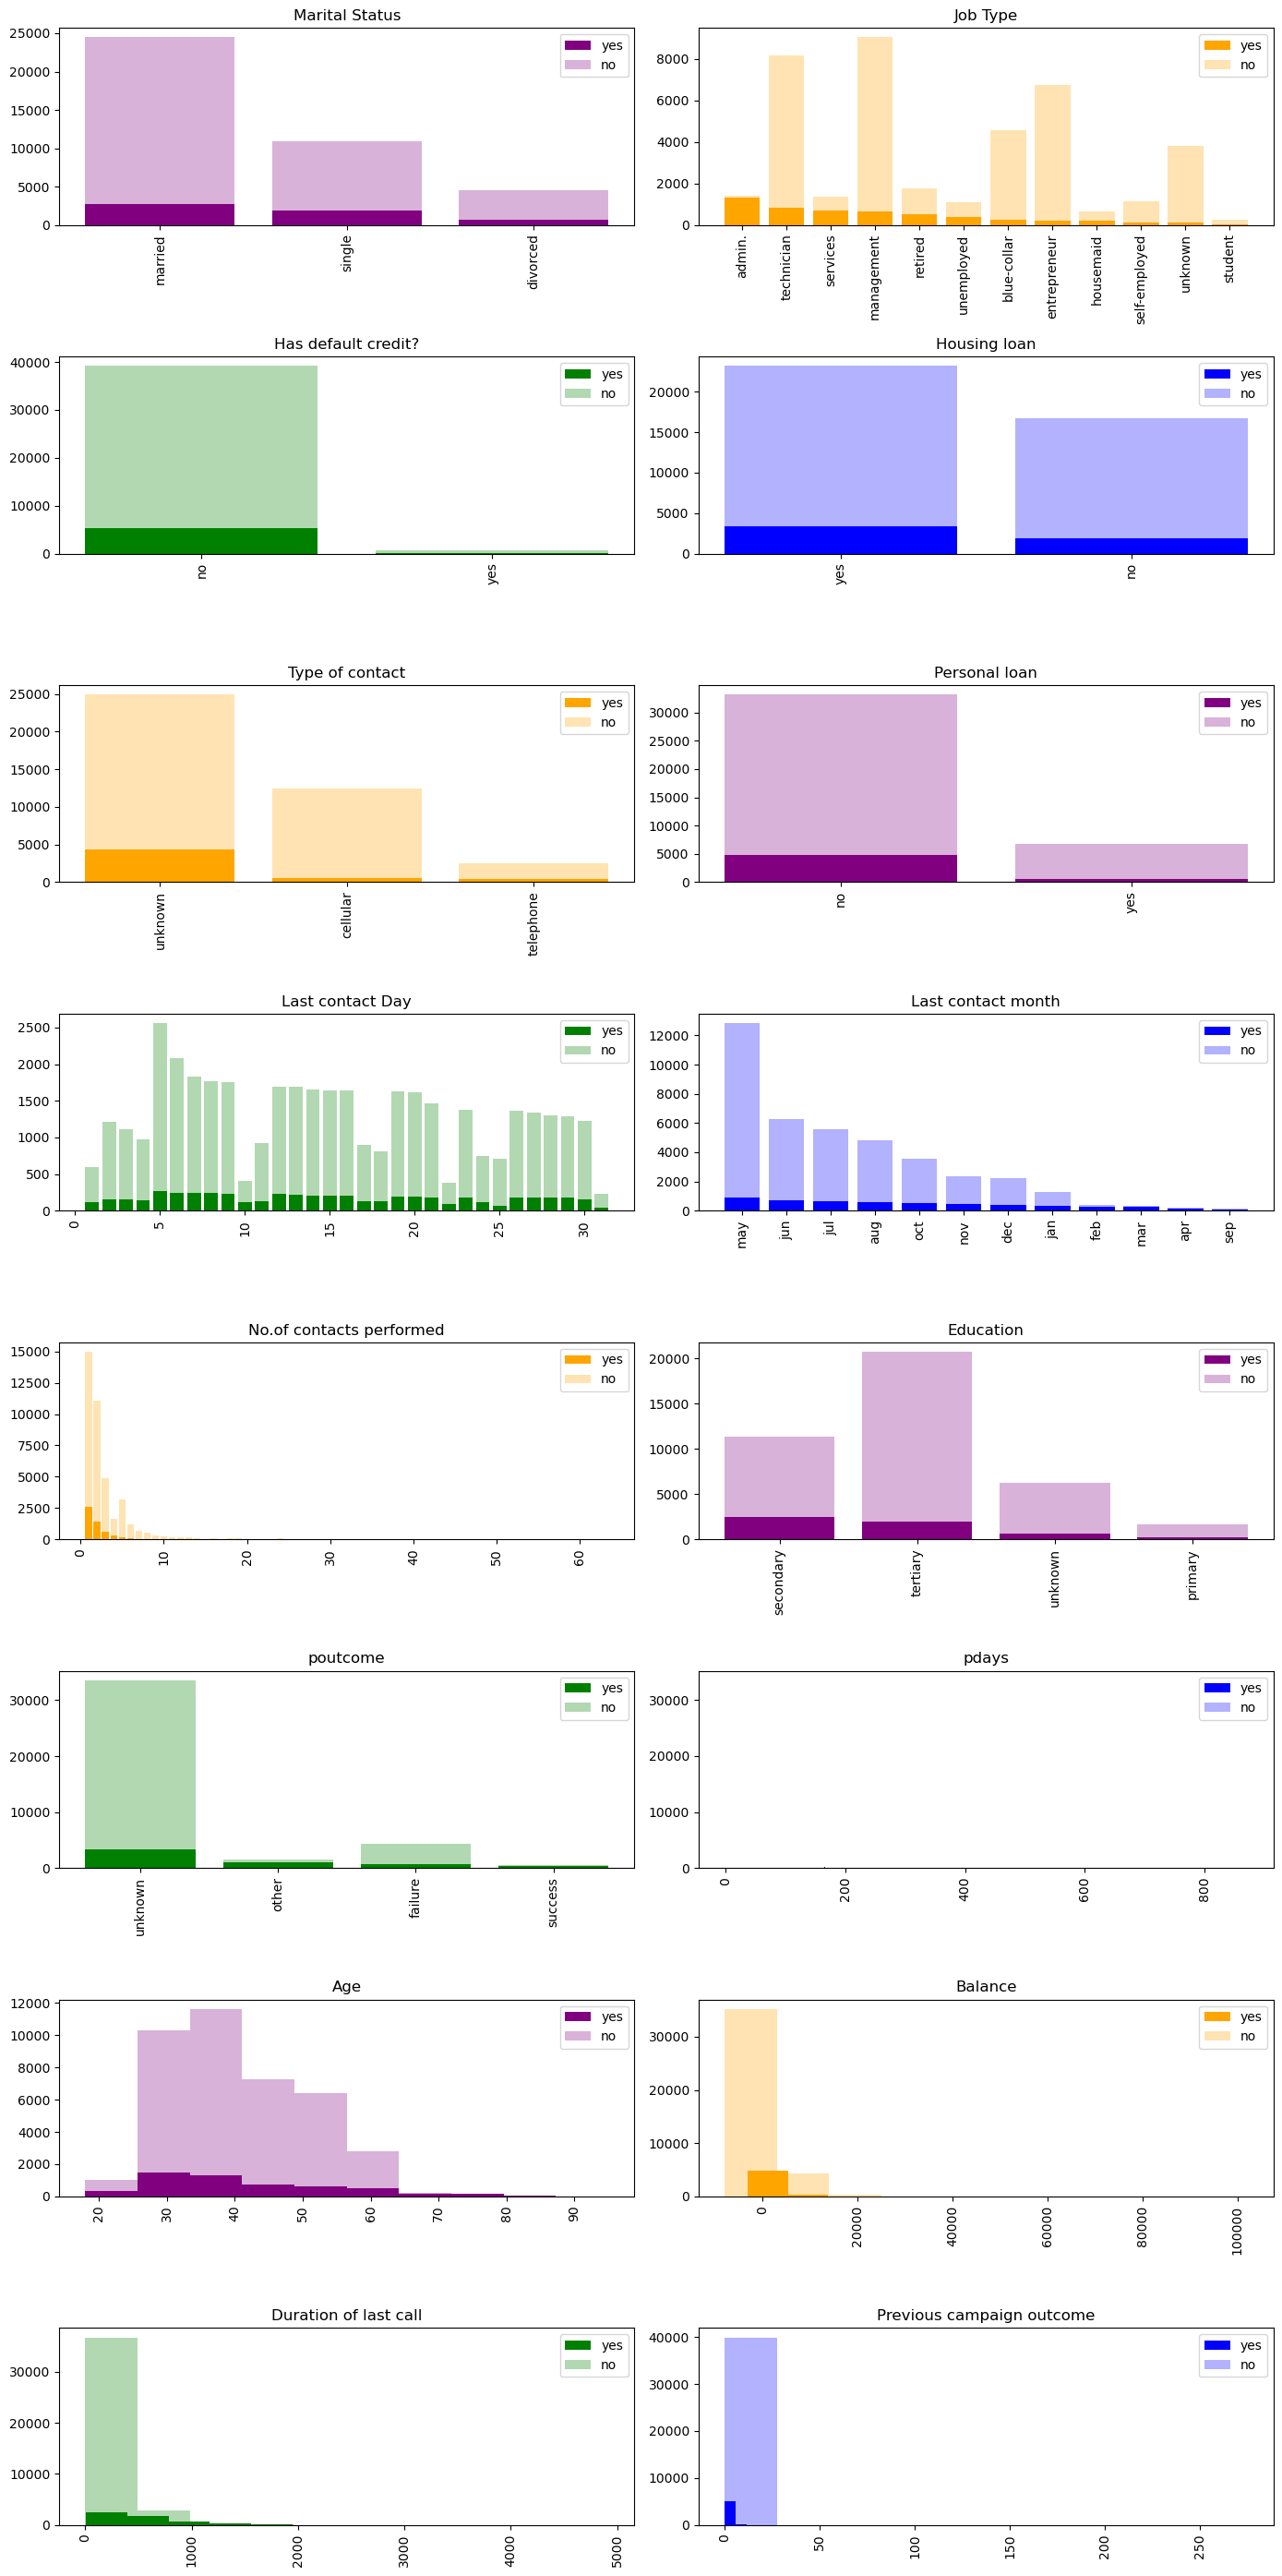

In [135]:
fig, axes=plt.subplots(figsize=(14,28),nrows=8,ncols=2)
#Marital
axes[0,0].bar(d_yes.marital.unique(),height = d_yes['marital'].value_counts(),color='purple',label='yes')
axes[0,0].bar(d_no.marital.unique(),height = d_no['marital'].value_counts(),color='purple',alpha=0.3,label='no')
axes[0,0].tick_params(axis='x',rotation=90)
axes[0,0].set_title('Marital Status')
axes[0,0].legend()
#job
axes[0,1].bar(d_yes.job.unique(),height = d_yes['job'].value_counts(),color='orange',label='yes')
axes[0,1].bar(d_no.job.unique(),height = d_no['job'].value_counts(),color='orange',alpha=0.3,label='no')
axes[0,1].tick_params(axis='x',rotation=90)
axes[0,1].set_title('Job Type')
axes[0,1].legend()
#default
axes[1,0].bar(d_yes.default.unique(),height = d_yes['default'].value_counts(),color='g',label='yes')
axes[1,0].bar(d_no.default.unique(),height = d_no['default'].value_counts(),color='g',alpha=0.3,label='no')
axes[1,0].tick_params(axis='x',rotation=90)
axes[1,0].set_title('Has default credit?')
axes[1,0].legend()
#housing
axes[1,1].bar(d_yes.housing.unique(),height = d_yes['housing'].value_counts(),color='b',label='yes')
axes[1,1].bar(d_no.housing.unique(),height = d_no['housing'].value_counts(),color='b',alpha=0.3,label='no')
axes[1,1].tick_params(axis='x',rotation=90)
axes[1,1].set_title('Housing loan')
axes[1,1].legend()
#loan
axes[2,1].bar(d_yes.loan.unique(),height = d_yes['loan'].value_counts(),color='purple',label='yes')
axes[2,1].bar(d_no.loan.unique(),height = d_no['loan'].value_counts(),color='purple',alpha=0.3,label='no')
axes[2,1].tick_params(axis='x',rotation=90)
axes[2,1].set_title('Personal loan')
axes[2,1].legend()
# contact
axes[2,0].bar(d_yes.contact.unique(),height = d_yes['contact'].value_counts(),color='orange',label='yes')
axes[2,0].bar(d_no.contact.unique(),height = d_no['contact'].value_counts(),color='orange',alpha=0.3,label='no')
axes[2,0].tick_params(axis='x',rotation=90)
axes[2,0].set_title('Type of contact')
axes[2,0].legend()
# day
axes[3,0].bar(d_yes.day.unique(),height = d_yes['day'].value_counts(),color='g',label='yes')
axes[3,0].bar(d_no.day.unique(),height = d_no['day'].value_counts(),color='g',alpha=0.3,label='no')
axes[3,0].tick_params(axis='x',rotation=90)
axes[3,0].set_title('Last contact Day')
axes[3,0].legend()
#month
axes[3,1].bar(d_yes.month.unique(),height = d_yes['month'].value_counts(),color='b',label='yes')
axes[3,1].bar(d_no.month.unique(),height = d_no['month'].value_counts(),color='b',alpha=0.3,label='no')
axes[3,1].tick_params(axis='x',rotation=90)
axes[3,1].set_title('Last contact month')
axes[3,1].legend()
#education
axes[4,1].bar(d_yes.education.unique(),height = d_yes['education'].value_counts(),color='purple',label='yes')
axes[4,1].bar(d_no.education.unique(),height = d_no['education'].value_counts(),color='purple',alpha=0.3,label='no')
axes[4,1].tick_params(axis='x',rotation=90)
axes[4,1].set_title('Education')
axes[4,1].legend()
#campaign
axes[4,0].bar(d_yes.campaign.unique(),height = d_yes['campaign'].value_counts(),color='orange',label='yes')
axes[4,0].bar(d_no.campaign.unique(),height = d_no['campaign'].value_counts(),color='orange',alpha=0.3,label='no')
axes[4,0].tick_params(axis='x',rotation=90)
axes[4,0].set_title('No.of contacts performed')
axes[4,0].legend()
#poutcome
axes[5,0].bar(d_yes.poutcome.unique(),height = d_yes['poutcome'].value_counts(),color='g',label='yes')
axes[5,0].bar(d_no.poutcome.unique(),height = d_no['poutcome'].value_counts(),color='g',alpha=0.3,label='no')
axes[5,0].tick_params(axis='x',rotation=90)
axes[5,0].set_title('poutcome')
axes[5,0].legend()
#previous
axes[5,1].bar(d_yes.pdays.unique(),height = d_yes['pdays'].value_counts(),color='b',label='yes')
axes[5,1].bar(d_no.pdays.unique(),height = d_no['pdays'].value_counts(),color='b',alpha=0.3,label='no')
axes[5,1].tick_params(axis='x',rotation=90)
axes[5,1].set_title('pdays')
axes[5,1].legend()
#Age
axes[6,0].hist(d_yes.age,color='purple',label='yes')
axes[6,0].hist(d_no.age,color='purple',alpha=0.3,label='no')
axes[6,0].tick_params(axis='x',rotation=90)
axes[6,0].set_title('Age')
axes[6,0].legend()
#balance
axes[6,1].hist(d_yes.balance,color='orange',label='yes')
axes[6,1].hist(d_no.balance,color='orange',alpha=0.3,label='no')
axes[6,1].tick_params(axis='x',rotation=90)
axes[6,1].set_title('Balance')
axes[6,1].legend()
#duration
axes[7,0].hist(d_yes.duration,color='g',label='yes')
axes[7,0].hist(d_no.duration,color='g',alpha=0.3,label='no')
axes[7,0].tick_params(axis='x',rotation=90)
axes[7,0].set_title('Duration of last call')
axes[7,0].legend()
#previous
axes[7,1].hist(d_yes.previous,color='b',label='yes')
axes[7,1].hist(d_no.previous,color='b',alpha=0.3,label='no')
axes[7,1].tick_params(axis='x',rotation=90)
axes[7,1].set_title('Previous campaign outcome')
axes[7,1].legend()
plt.tight_layout()

#### From the plots it is quite evident that proportion of 'no' is very much larger than 'yes' which makes our data imbalanced.
#### i.e proportion of minority class to majority class is too low .We may need some imbalance data treatement in this case

### Data Preprocessing

#### Let's drop some colums that merely affect our model; day & month
#### poutcome& contact : majority of the data is unknown 
#### Considering education is not a basis and also we have data about the job type.education column contains lots of unknown values
#### Convert columns with 'yes' &'no' to 1 &0

In [8]:
data_1=bank_data.drop(['day','month','contact','poutcome','education'],axis=1)
data_1.housing=data_1.housing.map({'yes':1,'no':0})
data_1.loan=data_1.loan.map({'yes':1,'no':0})
data_1.y=data_1.y.map({'yes':1,'no':0})
data_1.default=data_1.default.map({'yes':1,'no':0})


data_1.head()

,age,job,marital,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,management,married,0,2143,1,0,261,1,-1,0,0
1,44,technician,single,0,29,1,0,151,1,-1,0,0
2,33,entrepreneur,married,0,2,1,1,76,1,-1,0,0
3,47,blue-collar,married,0,1506,1,0,92,1,-1,0,0
4,33,unknown,single,0,1,0,0,198,1,-1,0,0


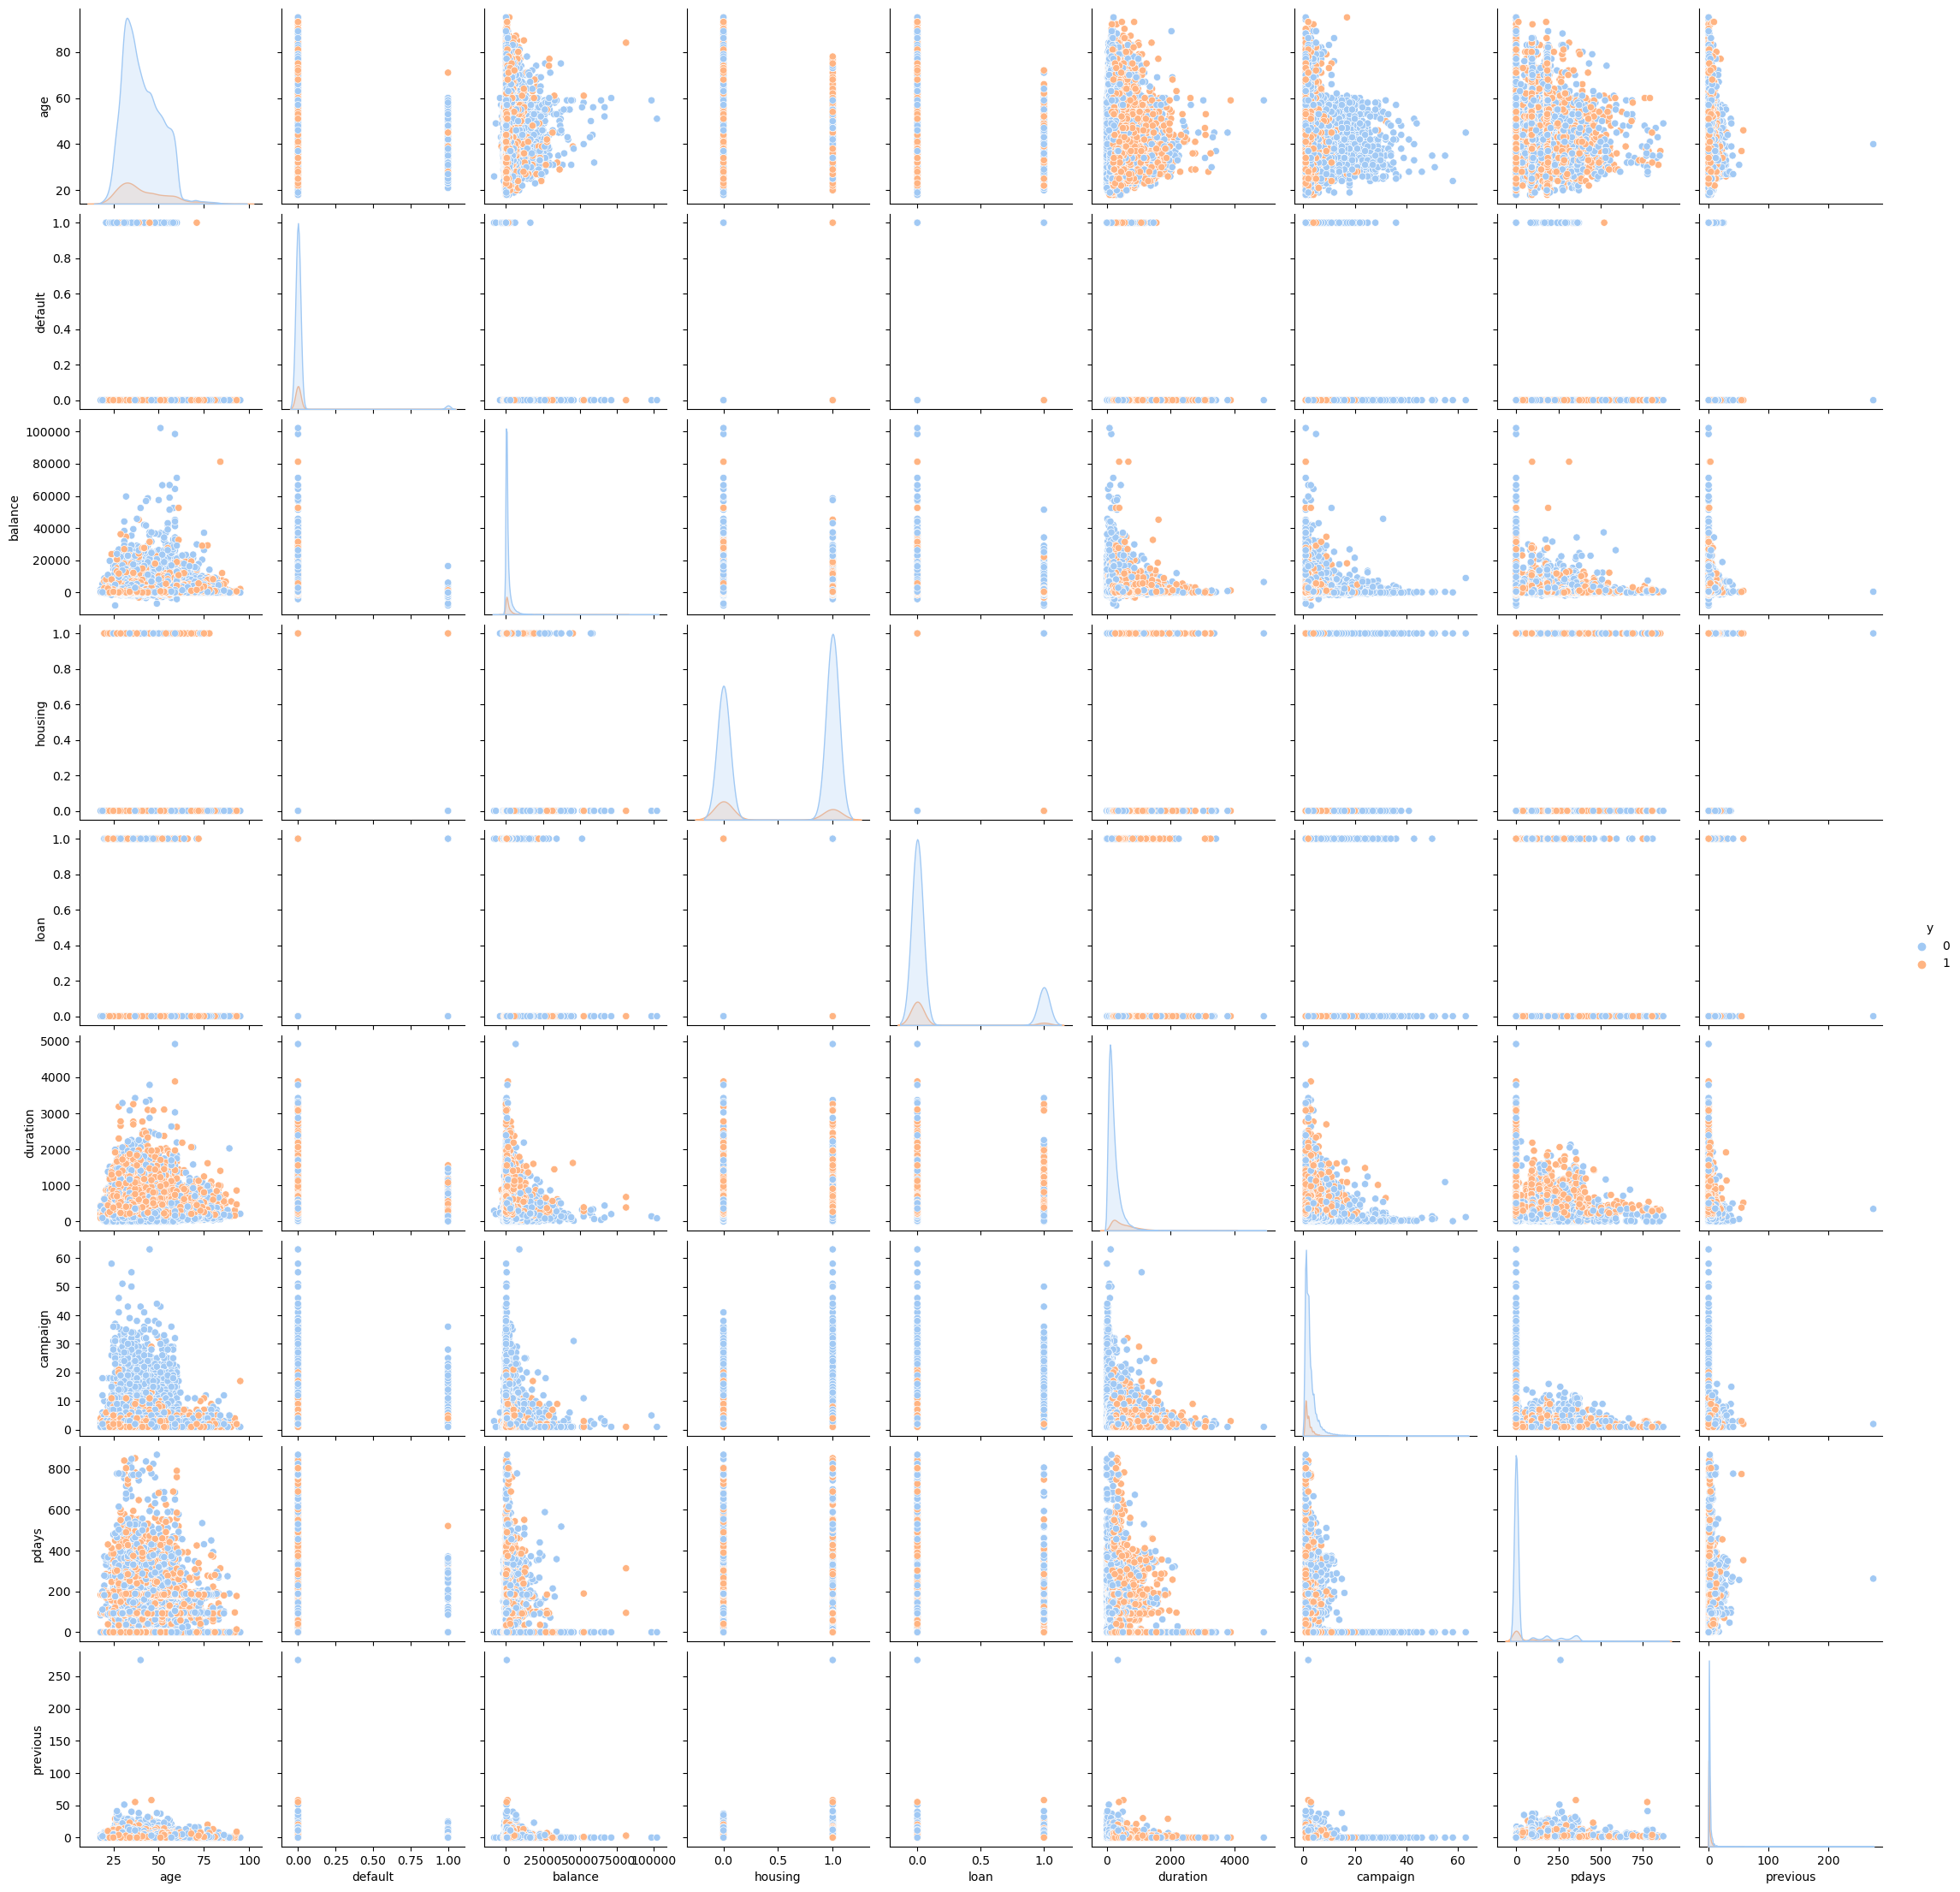

In [8]:
sns.pairplot(data_1,hue='y',palette='pastel')

### Treatement of categorical variables

#### Let's opt for dummy variables for the categorical variables job,marital,education

In [9]:
job      =pd.get_dummies(data_1['job'],drop_first=True)
marital  =pd.get_dummies(data_1['marital'],drop_first=True)

In [10]:
data_1.drop(['job','marital'],axis=1,inplace=True)
data_1.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,261,1,-1,0,0
1,44,0,29,1,0,151,1,-1,0,0
2,33,0,2,1,1,76,1,-1,0,0
3,47,0,1506,1,0,92,1,-1,0,0
4,33,0,1,0,0,198,1,-1,0,0


In [11]:
data_1= pd.concat([data_1,job,marital],axis=1)

#### Data with dummy variables

In [12]:
data_1.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,management,retired,self-employed,services,student,technician,unemployed,unknown,married,single
0,58,0,2143,1,0,261,1,-1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,1,0,1


#### Check for Imbalance

<Axes: xlabel='y', ylabel='count'>

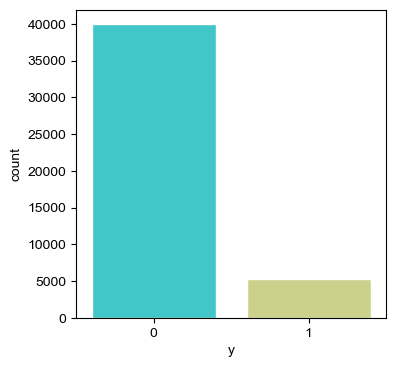

In [13]:
plt.subplots(figsize=(4,4))
sns.set_style('darkgrid')
sns.countplot(x='y',data=data_1,palette='rainbow')

In [14]:
data_1.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

#### Data is highly imbalanced. Lets do downsampling  since our data size  large

In [15]:
from sklearn.utils import resample

class_minority=data_1[data_1.y==1]
class_majority=data_1[data_1.y==0]

down_majority =resample(class_majority,replace=False,n_samples=len(class_minority),random_state=100)

In [17]:
data_resampled=pd.concat([class_minority,down_majority])
data_resampled.y.value_counts()

1    5289
0    5289
Name: y, dtype: int64

<Axes: >

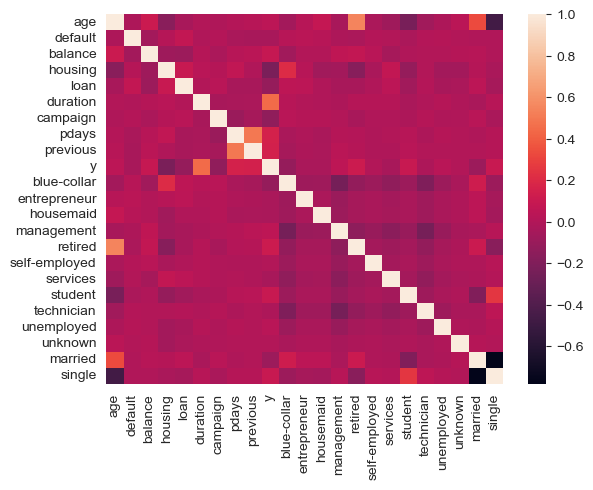

In [279]:
sns.heatmap(data_resampled.corr(),cmap='rocket')

#### heatmap looks satisfactory. Lets forward to modelling

### Logistic Regression Modelling

#### Train Test & Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data_resampled.drop('y',axis=1),  data_resampled['y'], 
                                                    test_size=0.25, random_state=200)

### Train the model

In [20]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

### Predictions

In [21]:
y_pred = logmodel.predict(X_test)
np.array(y_pred)

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [22]:
np.array(y_test)

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

### Model Evaluation

#### Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[1044  248]
 [ 294 1059]]


In [24]:
Accuracy = (1044+1059)/(1044+1059+248+294)
Accuracy

0.7950850661625709

#### Classification Report

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1292
           1       0.81      0.78      0.80      1353

    accuracy                           0.80      2645
   macro avg       0.80      0.80      0.80      2645
weighted avg       0.80      0.80      0.80      2645



#### Area Under Curve

Text(0, 0.5, 'True Positive Rate')

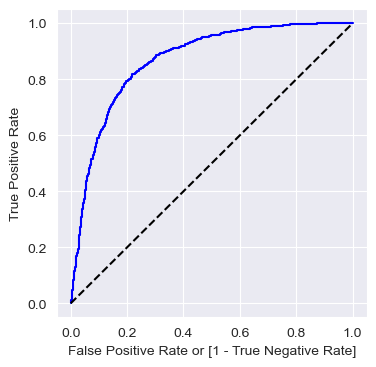

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,threshold = roc_curve(y_test,logmodel.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)
plt.subplots(figsize=(4,4))
plt.plot(fpr, tpr, color='b')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [38]:
auc

0.7953773176909928

### Model Improvement
### SMOTE
#### let's try to improve our model by introducing SMOTE 

In [39]:
X1=data_1.drop('y',axis=1)
y1=data_1['y']

In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X1, y1)

#### Train Test Split

In [47]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_smote,y_smote, 
                                                    test_size=0.25, random_state=220)

#### Logistic modelling

In [48]:
logmodel1 = LogisticRegression(solver='liblinear')
logmodel1.fit(X2_train,y2_train)

LogisticRegression(solver='liblinear')

#### Prediction

In [49]:
y2_pred = logmodel.predict(X2_test)
np.array(y2_pred)

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

#### Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y2_test,y2_pred)
print (confusion_matrix)

[[8087 1887]
 [1374 8613]]


In [51]:
Accuracy = (8613+8087)/(8087+8613+1374+1887)
Accuracy

0.8366314312910175

#### Classification Report

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      9974
           1       0.82      0.86      0.84      9987

    accuracy                           0.84     19961
   macro avg       0.84      0.84      0.84     19961
weighted avg       0.84      0.84      0.84     19961



#### AUC

Text(0, 0.5, 'True Positive Rate')

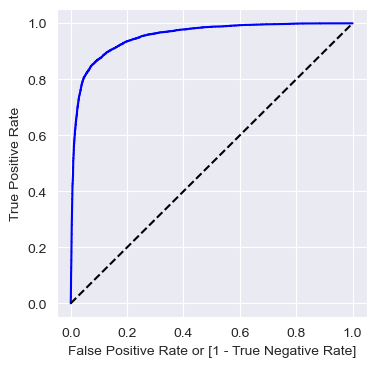

In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,threshold = roc_curve(y2_test,logmodel1.predict_proba(X2_test)[:,1])
auc = roc_auc_score(y2_test, y2_pred)
plt.subplots(figsize=(4,4))
plt.plot(fpr, tpr, color='b')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [60]:
auc

0.8366146242772512

#### We have achieved a model using the SMOTE oversampling techniques with an increased value ofaccuracy, precision, recall and f1-score of .84. Area under Curve is 0.8366

 precision    recall  f1-score   support

           0       0.85      0.81      0.83      9974
           1       0.82      0.86      0.84      9987

    accuracy                           0.84     19961
   macro avg       0.84      0.84      0.84     19961
weighted avg       0.84      0.84      0.84     19961


### Model Concerns and Conclusion

In [67]:
y_smote.value_counts()

0    39922
1    39922
Name: y, dtype: int64

#### If we look into the size of sample obtained by SMOTE it is around 40000.Our minority class size was around 5000 only before using SMOTE. i.e sample size has increased around 8 times.This may arise problems like overfitting in real case scenarios.
#### So since our undersampled model gives decent perfomance, We can choose logmodel as our final model.